# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [36]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    # ... ENTER YOUR CODE HERE ...
    x_up = x + h
    dx = x_up - x
    df = f(x_up) - f(x)
    return df / dx

In [37]:
def bad_deriv(f, x, h):
    # ... ENTER YOUR CODE HERE ...
    x_up = x + h
    df = f(x_up) - f(x)
    return df / h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

0.010000 --  0.0001
0.001000 --   1e-06
0.000100 --   1e-08
0.000010 --   1e-10


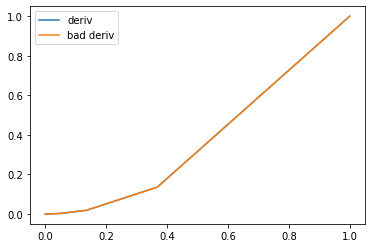

In [38]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))
    
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.exp(-i) for i in range(16)], [deriv(lambda x: x**3, x, np.exp(-i)) for i in range(16)], label='deriv')
plt.plot([np.exp(-i) for i in range(16)], [bad_deriv(lambda x: x**3, x, np.exp(-i)) for i in range(16)], label='bad deriv')
plt.legend()

 ... ENTER YOUR COMMENTS HERE ...
 the errors seem to be decreasing with decreasing value of x.

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [39]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [40]:
def derive_two_sided(f, x, h):
    x_up = x + h
    x_down = x - h
    dx = x_up - x_down
    df = f(x_up) - f(x_down)
    return df / dx

Deriv: 0.010000 -- 0.01503
Deriv: 0.001000 --  0.0015
Deriv: 0.000100 -- 0.00015
Deriv: 0.000010 -- 1.5e-05
tow sided deriv: 0.010000 -- 3.333e-05
tow sided deriv: 0.001000 -- 3.333e-07
tow sided deriv: 0.000100 -- 3.333e-09
tow sided deriv: 0.000010 -- 3.333e-11
bad deriv: 0.010000 -- 0.01503
bad deriv: 0.001000 --  0.0015
bad deriv: 0.000100 -- 0.00015
bad deriv: 0.000010 -- 1.5e-05


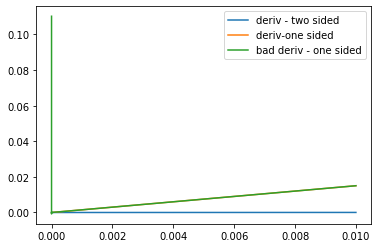

In [42]:
# ... ENTER YOUR CODE HERE ...
x = 1
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("Deriv: %5f -- %7.4g" % (h, err))
    
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = derive_two_sided(f, x, h) - fder(x)
    print("tow sided deriv: %5f -- %7.4g" % (h, err))
    
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = bad_deriv(f, x, h) - fder(x)
    print("bad deriv: %5f -- %7.4g" % (h, err))
    
    
import numpy as np
import matplotlib.pyplot as plt
h = np.array([10**(-i) for i in range(2,16)])
plt.plot(h, np.array([derive_two_sided(f, x, ih) for ih in h]) - fder(x), label='deriv - two sided')
plt.plot(h, np.array([deriv(f, x, ih) for ih in h]) - fder(x), label='deriv-one sided')
plt.plot(h, np.array([bad_deriv(f, x, ih) for ih in h]) - fder(x), label='bad deriv - one sided')

plt.legend()

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [43]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.04605
0.001000 -- -0.006908
0.000100 -- -0.000921
0.000010 -- -0.0001151


... ENTER YOUR EXPLANATION HERE ...

In [ ]:
def higher_order_deriv(f, x, h):
    x1 = x + h #keeping them consistent 
    x2 = x + 2 * h
    dx = x1 - x
    fder = ((-3/2) * f(x) 
            +  2 * f(x1) 
            - (1/2) * f(x2)) / dx #This formula was written by Evgeny in "Higher order schemes" lesson
    return fder 

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [102]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    summ = 0
    summ_prev = np.inf
    N = 50 #starting with 50 points mesh
    i = 0
    while(abs(summ - summ_prev) >= eps):
        summ_prev = summ
        h = (b - a) / N
        summ = 0
        for j in range(N):
            x = a + h*(j+0.5)
            summ += func(x) * h
 
        N = 2*N
    return summ, N

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [103]:
def func(x):
    return x**3

In [109]:
eps =  0.001
midpoint_rule(func, 0, 1, eps)

(0.2499875, 200)

In [94]:
def midrect(func, a, b, N):
    h = (b - a) / N
    summ = 0
    for j in range(N):
        x = a + h*(j+0.5)
        summ += func(x) * h
    return summ

In [95]:
for n in (10, 100, 1000, 10000):
    res = midrect(func, 0, 1, n)
    print("%5.5g : %g" %(n, res - 0.25))

   10 : -0.00125
  100 : -1.25e-05
 1000 : -1.25e-07
10000 : -1.25e-09


looks like the error here is decreasing as square of the number of steps. 

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [62]:
# ... ENTER YOUR CODE HERE ...
def sinfunc(x):
    return np.sin(np.sqrt(x)) / x

In [71]:
for n in (10, 100, 1000, 10000):
    res = midpoint_rule(sinfunc, 0, 1, n)
    print("%5.5g : %g" %(n, res))

   10 : 1.7008
  100 : 1.83167
 1000 : 1.87304
10000 : 1.88612


In [72]:
def sinfunc_adjusted(x):
    return (np.sin(np.sqrt(x)) / x) - (1/np.sqrt(x))

In [73]:
for n in (10, 100, 1000, 10000):
    res = midpoint_rule(sinfunc_adjusted, 0, 1, n)
    print("%5.5g : %g" %(n, res+2))

   10 : 1.89188
  100 : 1.89216
 1000 : 1.89217
10000 : 1.89217


when I added and sibtracted teh singularity, $\frac{1}{\sqrt{x}}$; it converges faster!. I added 2 explicitly because the integral of the singularity added is 2 when integrated from 0 to 1. 

## other codes in the videos

In [69]:
def lrect(func, a, b, npts):
    """ left side integral """
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*j
        summ += func(x) * h
    return summ

In [70]:
for n in (10, 100, 1000, 10000):
    res = lrect(func, 0, 1, n)
    print("%5.5g : %g" %(n, res - 0.25))

   10 : -0.0475
  100 : -0.004975
 1000 : -0.00049975
10000 : -4.99975e-05


looks like linear scaling. if I increase n by factor of 10; error decrease by factor of 10.